In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy import stats
from itertools import cycle
from activation_utils import *

matplotlib.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
FIG_SIZE = (6,4)
FIG_DIR = 'final-figures/'
FONTSIZE = 13
lr = 1e-3

### Compute effective rank metrics

In [9]:
### fraction of effective rank of untouched subspace of previous task over total effective rank
### of previous tasks subspace
results_untouched_frac = compute_dim_across_tasks(lr,
                      1,
                      ['dfc-rec', 'dfc-sparse', 'dfc-sparse-rec'],
                      ['-controller', '-controller', '-controller'],
                      mode='across_task_first_learned',
                      accumulate_activations=False,
                      untouched_frac=True)

dfc-rec -controller
dfc-sparse -controller
dfc-sparse-rec -controller


In [10]:
### effective rank of most recently learned task targets
results_curr = compute_dim_across_tasks(lr,
                      1,
                      ['dfc-rec', 'dfc-sparse', 'dfc-sparse-rec'],
                      ['-controller', '-controller', '-controller'],
                      mode='across_task_first_learned',
                      accumulate_activations=False,
                      untouched_frac=False)

dfc-rec -controller
dfc-sparse -controller
dfc-sparse-rec -controller


In [11]:
### Plot effective rank metrics

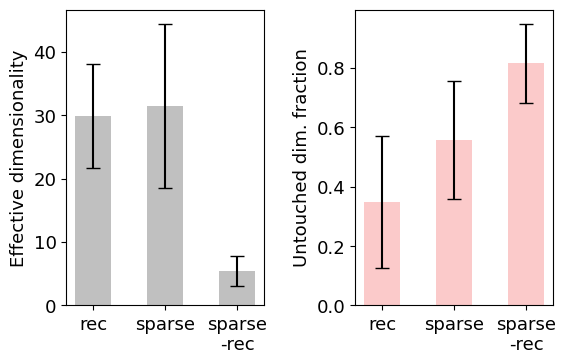

In [12]:
plt.rcParams["figure.figsize"] = (6, 4)

untouched_frac_means = []
untouched_frac_stds = []
curr_dim_means = []
curr_dim_stds = []
width = 0.5
names = ['dfc-rec', 'dfc-sparse', 'dfc-sparse-rec']
for name in names:
    untouched_frac_means.append(results_untouched_frac[name][1:].mean())
    untouched_frac_stds.append(results_untouched_frac[name][1:].std())
    curr_dim_means.append(results_curr[name].mean())
    curr_dim_stds.append(results_curr[name].std())
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.patch.set_facecolor('white')

barlists = []


barlist = ax[0].bar(range(len(names)), curr_dim_means, width, yerr=curr_dim_stds, label='effective dim', capsize=5, color='silver')
ax[0].set_ylabel('Effective dimensionality', fontsize=FONTSIZE)


barlist = ax[1].bar(range(len(names)), untouched_frac_means, width, yerr=untouched_frac_stds,
                    label='untouched frac', capsize=5, color=[np.array([251, 202, 202]) / 255])
ax[1].set_ylabel('Untouched dim. fraction', fontsize=FONTSIZE)
ax[1].set_ylim(0, None)

label_names = ['rec', 'sparse', 'sparse\n-rec']
ax[0].set_xticks(range(len(names)), label_names, fontsize=FONTSIZE)
ax[1].set_xticks(range(len(names)), label_names, fontsize=FONTSIZE)
ax[0].tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax[1].tick_params(axis='both', which='major', labelsize=FONTSIZE)
fig.tight_layout(pad=2.0)
plt.savefig(f'{FIG_DIR}target-dimensionality-classIL.svg', format='svg', bbox_inches = "tight")